<a href="https://colab.research.google.com/github/cannedhedgehog/Saturday/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%201%20%D0%9D%D0%B0%D0%B7%D0%B0%D1%80%D0%BE%D0%B2%20%D0%A1%D0%B0%D1%85%D0%B0%D1%80%D0%BD%D0%BE%D0%B2%D0%B0!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 кластеризация (методом k-средних)
 1. Найти минимальное кол-во кластеров, обеспечивающих приемлемый уровень
кластеризации.
 2. Выполнить кластеризацию данного множества точек методом k-средних по найденному
кол-ву кластеров (выбор координат начальных центров масс кластеров не важен).
 3. Напечатать: - количество точек в каждом кластере- координаты центроидов кластеров.
 4. Выполнить кластеризацию (шаг 2) с визуализацией для 3 любых различных значений
параметра random_state

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = np.array([
    [21.61306753, 16.09447883],
    [7.98813431, 0.67679300],
    [12.78067056, 9.44744798],
    [21.67157295, 19.08574743],
    [1.24449628, 5.13383859],
    [12.26171065, 10.66137545],
    [3.10883299, 6.11977858],
    [12.29631800, 9.40033687],
    [20.89172920, 19.61684215],
    [4.09840194, 5.65169654],
    [2.24477326, 5.49610720],
    [12.52341452, 11.55944977],
    [8.02072587, 0.80455485],
    [8.40501734, 2.09259538],
    [21.57540173, 19.13007355],
    [12.69962615, 13.74596030],
    [12.81863656, 14.16801835],
    [7.83883854, 1.76362260],
    [21.60080587, 18.38221302],
    [1.70109574, 5.68398136],
    [12.06733968, 13.03231444],
    [2.41535472, 5.58483920],
    [0.47390555, 5.91866513],
    [7.63722164, 0.79588432],
    [23.12492314, 17.46234186],
    [7.59839062, 1.93507084],
    [12.74965896, 11.33328311],
    [7.04276732, 1.92557705],
    [0.45468654, 5.34673092],
    [6.98577811, 1.07159504],
    [19.76271202, 19.49122164],
    [11.90050788, 10.05797287],
    [22.69674255, 18.98215688],
    [2.21489401, 5.43384350],
    [21.73328724, 19.60003077],
    [2.64421407, 5.64402364],
    [7.47373514, 0.80283106],
    [12.90557668, 11.91559364],
    [7.69590124, 1.35347514],
    [22.11145073, 17.57932293]
])

In [3]:
# Список для хранения значений инерции (сумма квадратов расстояний
# от точек до ближайших центроидов).
inertia_values = []

определение оптимального числа кластеров методом локтя

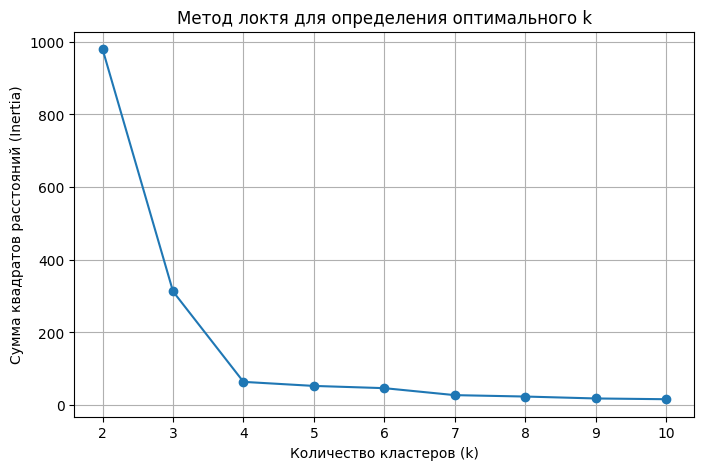

In [4]:
# Перебор числа кластеров от 2 до 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# График метода локтя
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia_values, marker="o")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Сумма квадратов расстояний (Inertia)")
plt.title("Метод локтя для определения оптимального k")
plt.grid(True)
plt.show()


Кластеризация с оптимальным числом кластеров (4)

In [5]:
#красными маркерами обозначены центры каждого кластера
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Координаты центроидов кластеров:")
print(centroids)

unique_labels = np.unique(labels)
for lbl in unique_labels:
    print(f"В кластере {lbl} содержится {np.sum(labels == lbl)} точек")

Координаты центроидов кластеров:
[[21.6781693  18.54244291]
 [ 7.66865101  1.32219993]
 [12.50034596 11.53217528]
 [ 2.06006551  5.60135047]]
В кластере 0 содержится 10 точек
В кластере 1 содержится 10 точек
В кластере 2 содержится 10 точек
В кластере 3 содержится 10 точек


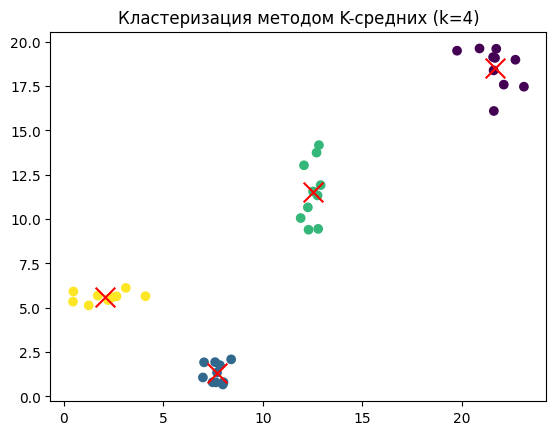

In [6]:
# Визуализация кластеров
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x", s=200)
plt.title(f"Кластеризация методом K-средних (k={optimal_k})")
plt.show()

Кластеризация с разными random_state для k=4

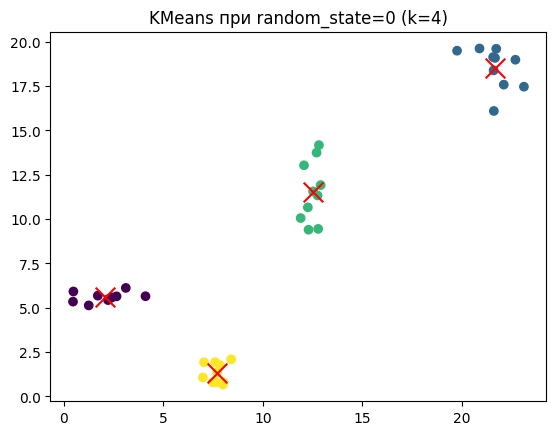

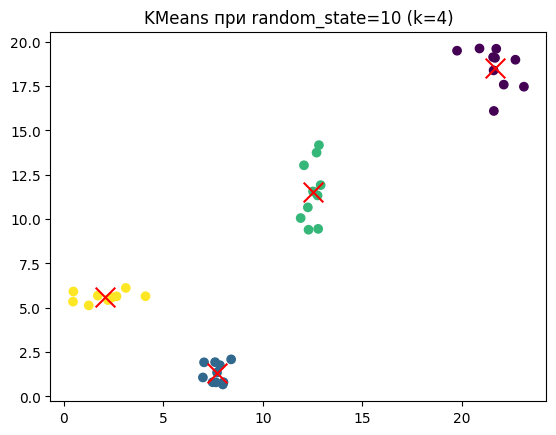

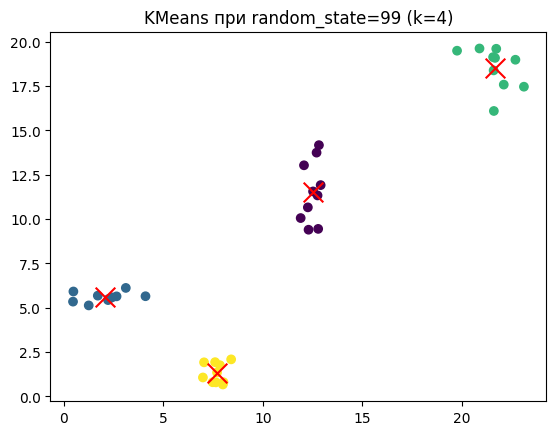

In [7]:
# Исходные данные хорошо разделены, так что независимо от начальной точки, кластеры сформированы похоже с различным random_states
random_states = [0, 10, 99]

for rs in random_states:
    kmeans = KMeans(n_clusters=optimal_k, random_state=rs)
    kmeans.fit(data)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis")
    plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x", s=200)
    plt.title(f"KMeans при random_state={rs} (k={optimal_k})")
    plt.show()